<a href="https://colab.research.google.com/github/rebeccalizaverghese/IBM-Data-Science/blob/main/7.6_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Practice Assessment - Data Analytics for Insurance Cost Data Set**

In [25]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# TASK 1
# Import the dataset
# Print the first 10 rows of the dataframe
file = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(file, header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [27]:
# Add headers to the dataframe
header = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges']
df.columns=header
df.columns

Index(['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [28]:
# Replace '?' entries with 'NaN'
df.replace('?', np.NaN, inplace=True)
df.head(5)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [29]:
# TASK 2
# Data Wrangling
# Use dataframe.info() to identify the columns that have some 'Null' (or NaN) information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [30]:
# Handle missing data
# Age - continuous attributes - replace missing value with mean
mean_age = df['age'].astype('float').mean(axis=0)
print("Average age is ", mean_age, "years.")
df['age'].replace(np.NaN, mean_age, inplace=True)

# Smoker - categorical attributes - replace missing values with frequency
freq = df['smoker'].value_counts().idxmax()
print("Most frequent number of smokers is ", freq)
df['smoker'].replace(np.NaN, freq, inplace=True)

# Update data types
df[['age','smoker']] = df[['age', 'smoker']].astype("int")

# Verify updating using df.info
print(df.info())

Average age is  39.10982658959538 years.
Most frequent number of smokers is  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


<ipython-input-30-2f00c66b6e65>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(np.NaN, mean_age, inplace=True)
<ipython-input-30-2f00c66b6e65>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [31]:
# Update the charges column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.
df[['charges']] = np.round(df[["charges"]],2)
df.head(6)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86
5,31,1,25.740,0,0,4,3756.62


(0.0, 66902.85800000001)

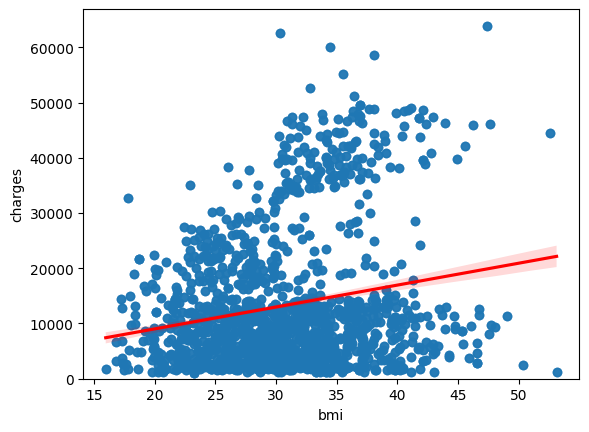

In [32]:
# TASK 3
# Exploratory Data Analysis
# Implement the regression plot for charges with respect to bmi.
sns.regplot(x='bmi', y='charges', data=df, line_kws={"color":"red"})
plt.ylim(0, )

<Axes: xlabel='smoker', ylabel='charges'>

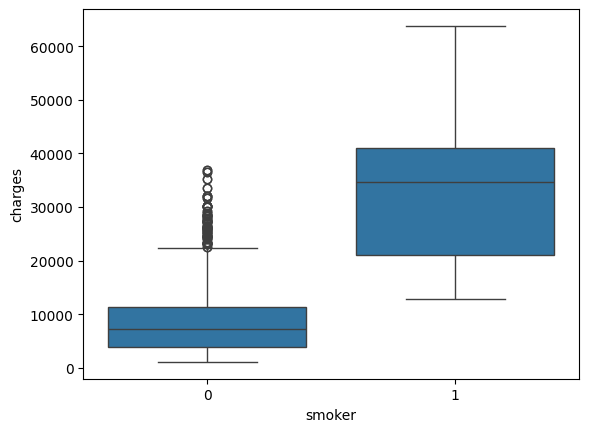

In [33]:
# Implement the box plot for charges with respect to smoker.
sns.boxplot(x='smoker', y='charges', data=df)

In [34]:
# Print the correlation matrix for the dataset
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [35]:
# TASK 4
# Model Development
# Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the R^2 score of this model.
lr = LinearRegression()
x = df[['smoker']]
y = df[['charges']]
lr.fit(x,y)
print("R^2 score = ", lr.score(x,y))

R^2 score =  0.6221791733924185


In [36]:
# Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the R^2 score of this model
z = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
lr.fit(z,y)
print("R^2 score = ", lr.score(z,y))

R^2 score =  0.7504083820289634


In [38]:
# Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset.
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(input)
z = z.astype(float)
pipe.fit(z,y)
ypipe = pipe.predict(z)
print(ypipe[0:3])
print("R^2 score = ", r2_score(y, ypipe))

[[23791.5]
 [ 2770.5]
 [ 5203. ]]
R^2 score =  0.8452483847008637


In [39]:
# TASK 5
# Model Refinement
# Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=1)

In [40]:
# Initialize a Ridge regressor that used hyperparameter Alpha=0.1 .Fit the model using training data data subset. Print the R^2 score for the testing data.
ridgemodel = Ridge(alpha=0.1)
ridgemodel.fit(x_train, y_train)
Yhat = ridgemodel.predict(x_test)
print(Yhat[0:3])
print(r2_score(y_test, Yhat))

[[33623.95784253]
 [ 2052.67061318]
 [ 8577.40601388]]
0.6760807731582404


In [42]:
# Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the R^2 score for the testing subset.
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
ridgemodel.fit(x_train_pr, y_train)
y_hat = ridgemodel.predict(x_test_pr)
print(r2_score(y_test, y_hat))

0.7835631107608152
